# Model Development

As we have collected our data, we now need to develop our baseline and machine learning models

In [1]:
# Linear model

from sklearn import linear_model


X = df_plot.index.factorize()[0].reshape(-1,1)
y = df_plot['rdsaas_open'].values

lr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lr.fit(X, y)
preds = lr.predict(X)

NameError: name 'df_plot' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_0 = df_plot.index.factorize()[0]
X_1 = df_plot["infected"].values
X = [[X_0[i], X_1[i]] for i in range(len(X_0))]
y = df_plot['rdsaas_open'].values

x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

model = linear_model.LinearRegression().fit(x_, y)
preds = model.predict(x_)

df_reg = df_plot
df_reg["prediction"] = preds
fig = plot_timeline(df_reg, {"rdsaas_open":"blue", "prediction":"green"}, df_reg.index, False)
# fig.update_layout(xaxis_type='category')
fig.show()


In [98]:
from sklearn.metrics import mean_squared_error

class BaseModel(Base):
    def __init__(self, model = None, data = None, X = None, Y = None, parameters = {}):
        super().__init__()
        self.X = X
        self.Y = Y
        self.data = data
        self.parameters = parameters
    
    def set_data(self, data = None):
        if data is not None:
            self.data = data
            return data
    
    def fit(self, X, Y):
        self.model.fit(self, X, Y)
    
    def predict(self, X, Y):
        preds = self.predict(X, Y)
        return preds
        
    def score(self, preds = self.):
        if preds is None:
            preds = self.model.predict(self.X, self.Y)
        err = mean_squared_error(self.Y, preds)
        return err
    
    def get_parameters(self):
        parameters = self.model.parameters
        return parameters
    
    def set_parameters(self, parameters):
        self.model.parameters = parameters

In [14]:
from sklearn import linear_model
import pandas as pd

data = pd.read_parquet('../data/preprocessed/combined.parquet')
display(data)

,rdsaas_open,rdsaas_close,rdsaas_low,rdsaas_high,infected,deceased,total_doses,partial_vaccinations,full_vaccinations,daily_doses,...,dt_iso_week,dt_is_weekend,dt_is_week,dt_is_monday,dt_is_tuesday,dt_is_wednesday,dt_is_thursday,dt_is_friday,dt_is_saturday,dt_is_sunday
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,24.589792,24.748285,24.547838,24.883471,0.0,0.0,0.0,0.0,0.0,0.0,...,0,True,False,0,0,0,1,0,0,0
2020-01-03,24.939410,25.107227,24.850841,25.149182,0.0,0.0,0.0,0.0,0.0,0.0,...,0,True,False,0,0,0,0,1,0,0
2020-01-04,24.939410,25.107227,24.850841,25.149182,0.0,0.0,0.0,0.0,0.0,0.0,...,0,False,True,0,0,0,0,0,1,0
2020-01-05,24.939410,25.107227,24.850841,25.149182,0.0,0.0,0.0,0.0,0.0,0.0,...,0,False,True,0,0,0,0,0,0,1
2020-01-06,25.312338,25.312338,25.307677,25.531432,0.0,0.0,0.0,0.0,0.0,0.0,...,1,True,False,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,16.624894,16.476458,16.448750,16.709998,0.0,0.0,0.0,0.0,0.0,0.0,...,19,True,False,1,0,0,0,0,0,0
2021-05-11,16.236981,15.880733,15.829274,16.278543,0.0,0.0,0.0,0.0,0.0,0.0,...,19,True,False,0,1,0,0,0,0,0
2021-05-12,15.920315,16.472500,15.809483,16.525938,0.0,0.0,0.0,0.0,0.0,0.0,...,19,True,False,0,0,1,0,0,0,0


In [15]:
X, Y  = data.infected.to_numpy(), data.deceased.to_numpy()

In [89]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np

models = {
    "lr": {
        "model": LinearRegression,
        "params": {
            "copy_X": True, 
            "fit_intercept": True, 
            "n_jobs": 1, 
            "normalize": True
        },
        "features": {
            "data": None,
            "X": None,
            "Y": None,
        },
    },
    "sgd": {
        "model": SGDRegressor,
        "params": {},
        "features": {
            "data": None,
            "X": None,
            "Y": None,
        },
    },
    "rfr": {
        "model": RandomForestRegressor,
        "params": {},
        "features": {
            "data": None,
            "X": None,
            "Y": None,
        },
    },
    "mlp": {
        "model": MLPRegressor,
        "params": {},
        "features": {
            "data": None,
            "X": None,
            "Y": None,
        },
    },
}

random_seed = np.random.seed(seed=42)

In [90]:
for model_name, item in models.items():
    print(f"Fitting model '{model_name}'")
    item["features"]["data"] = data
    item["features"]["X"] = X.reshape(-1, 1)
    item["features"]["Y"] = Y
    item["params"] = {}
    model = item["model"]
    model.fit(item["features"]["X"], item["features"]["Y"])

Fitting model 'lr'
Fitting model 'sgd'
Fitting model 'rfr'
Fitting model 'mlp'


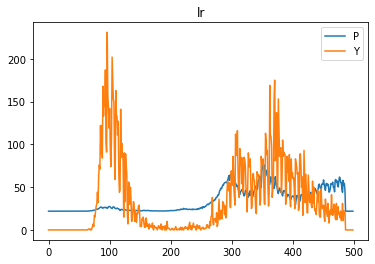

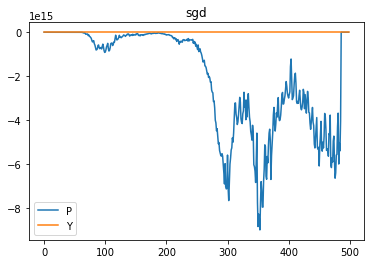

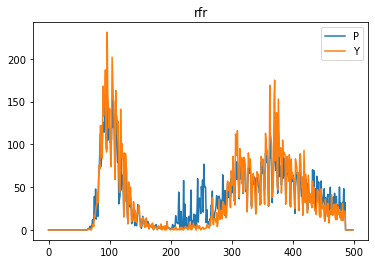

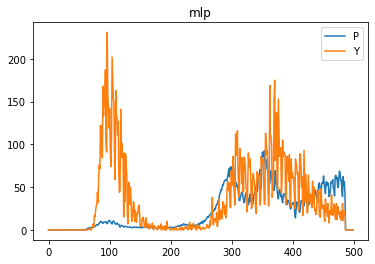

In [91]:
for model_name in models.keys():
    pd.DataFrame({
    #    "X": models[model_name]["features"]["X"].reshape(-1), 
        "P": models[model_name]["model"].predict(models[model_name]["features"]["X"]), 
        "Y": models[model_name]["features"]["Y"]
    }).plot.line(title=model_name)

In [119]:
import pandas as pd
data = pd.read_parquet('../data/preprocessed/combined.parquet')
display(data)

dt_iso_year_week  dt_year  dt_month  dt_day  \
date       ticker                                                
2020-01-01 NaN              2020-01     2020         1       1   
2020-01-02 AGN.AS           2020-01     2020         1       2   
           DSM.AS           2020-01     2020         1       2   
           HEIA.AS          2020-01     2020         1       2   
           RDSA.AS          2020-01     2020         1       2   
...                             ...      ...       ...     ...   
2021-08-20 NN.AS            2021-33     2021         8      20   
           UNA.AS           2021-33     2021         8      20   
           HEIA.AS          2021-33     2021         8      20   
2021-08-21 NaN              2021-33     2021         8      21   
2021-08-22 NaN              2021-33     2021         8      22   

                    dt_day_of_week  dt_iso_week  dt_is_weekend  dt_is_week  \
date       ticker                                                            
2020-01-01 NaN                   2            0           True       False   
2020-01-02 AGN.AS                3            0           True       False   
           DSM.AS                3            0           True       False   
           HEIA.AS               3            0           True       False   
           RDSA.AS               3            0           True       False   
...                            ...          ...            ...         ...   
2021-08-20 NN.AS                 4           33           True       False   
           UNA.AS                4           33           True       False   
           HEIA.AS               4           33           True       False   
2021-08-21 NaN                   5           33          False        True   
2021-08-22 NaN                   6           33          False        True   

                    dt_is_monday  dt_is_tuesday  ...  h3_policyvalue_actual  \
date       ticker                                ...                          
2020-01-01 NaN                 0              0  ...                    0.0   
2020-01-02 AGN.AS              0              0  ...                    0.0   
           DSM.AS              0              0  ...                    0.0   
           HEIA.AS             0              0  ...                    0.0   
           RDSA.AS             0              0  ...                    0.0   
...                          ...            ...  ...                    ...   
2021-08-20 NN.AS               0              0  ...                    0.0   
           UNA.AS              0              0  ...                    0.0   
           HEIA.AS             0              0  ...                    0.0   
2021-08-21 NaN                 0              0  ...                    0.0   
2021-08-22 NaN                 0              0  ...                    0.0   

                    h4_policyvalue_actual  h5_policyvalue_actual  \
date       ticker                                                  
2020-01-01 NaN                        0.0                    0.0   
2020-01-02 AGN.AS                     0.0                    0.0   
           DSM.AS                     0.0                    0.0   
           HEIA.AS                    0.0                    0.0   
           RDSA.AS                    0.0                    0.0   
...                                   ...                    ...   
2021-08-20 NN.AS                      0.0                    0.0   
           UNA.AS                     0.0                    0.0   
           HEIA.AS                    0.0                    0.0   
2021-08-21 NaN                        0.0                    0.0   
2021-08-22 NaN                        0.0                    0.0   

                    h6_policyvalue_actual  h7_policyvalue_actual  \
date       ticker                                                  
2020-01-01 NaN                        0.0                    0.0   
2020-01-02 AGN.AS           

In [120]:
full_blacklist = [
       'dt_iso_year_week', 'dt_year', 'dt_month', 'dt_day', 'dt_day_of_week',
       'dt_iso_week', 'dt_is_weekend', 'dt_is_week', 'dt_is_monday',
       'dt_is_tuesday', 'dt_is_wednesday', 'dt_is_thursday', 'dt_is_friday',
       'dt_is_saturday', 'dt_is_sunday', 
       'infected', 'deceased', 'open',
       'high', 'low', 'close', 'volume', 'is_original_stockdata',
       'open_is_increase', 'open_is_decrease', 'open_is_equal',
       'close_is_increase', 'close_is_decrease', 'close_is_equal',
       'low_is_increase', 'low_is_decrease', 'low_is_equal',
       'high_is_increase', 'high_is_decrease', 'high_is_equal',
       'volume_is_increase', 'volume_is_decrease', 'volume_is_equal',
       'total_doses', 'partial_vaccinations', 'full_vaccinations',
       'is_original_jhu', 'daily_doses',
       # '24h_average_wind_speed',
       # '24h_average_temperature', '24h_sum_of_precipitation',
       # '24h_average_air_pressure_converted_to_sea_level',
       # '24h_average_cloud_cover', '24h_average_relative_humidity',
       'c1_policyvalue_actual', 'c2_policyvalue_actual',
       'c3_policyvalue_actual', 'c4_policyvalue_actual',
       'c5_policyvalue_actual', 'c6_policyvalue_actual',
       'c7_policyvalue_actual', 'c8_policyvalue_actual',
       'e1_policyvalue_actual', 'e2_policyvalue_actual',
       'e3_policyvalue_actual', 'e4_policyvalue_actual',
       'h1_policyvalue_actual', 'h2_policyvalue_actual',
       'h3_policyvalue_actual', 'h4_policyvalue_actual',
       'h5_policyvalue_actual', 'h6_policyvalue_actual',
       'h7_policyvalue_actual', 'h8_policyvalue_actual',
       'v1_policyvalue_actual', 'v2_policyvalue_actual',
       'v3_policyvalue_actual', 'stringency_actual']

test score:  0.06602625991134643
test vs. pred run {i} [(14.526117139917545, 13.630718), (15.173654934315765, 13.580114), (14.740674121364215, 13.547125), (14.576373903267324, 13.722879), (14.576373903267324, 13.81225), (14.576373903267324, 13.835263), (14.497122404028316, 13.732623)]


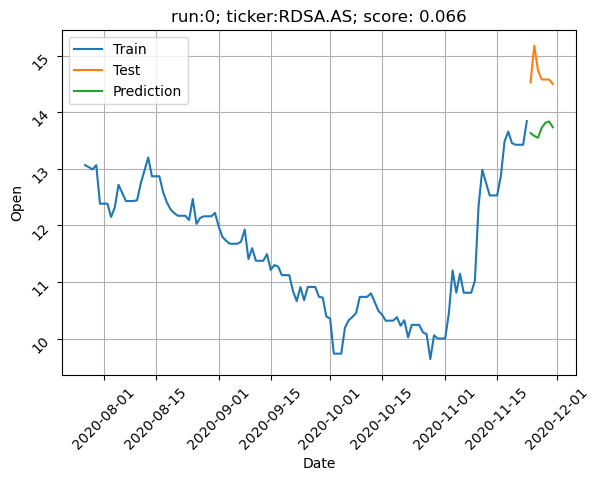

test score:  0.10358221492872931
test vs. pred run {i} [(11.204711867584022, 9.736029), (10.813337900594002, 9.773026), (11.14743741445847, 9.7908745), (10.811429412194618, 9.785053), (10.811429412194618, 9.768402), (10.811429412194618, 9.802511), (11.019524814280738, 10.012664)]


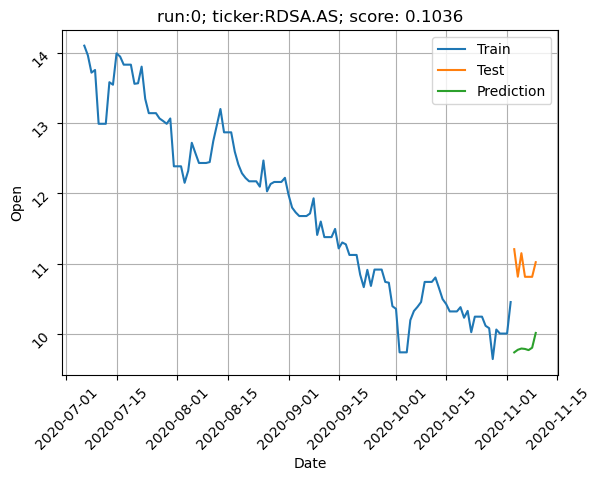

test score:  0.05643947364286393
test vs. pred run {i} [(14.057335194616956, 13.48623), (14.569714035083441, 14.14014), (14.9365105306455, 14.296625), (15.040498028083404, 14.199929), (15.040498028083404, 14.331762), (15.040498028083404, 14.294333), (16.146556899532452, 14.055484)]


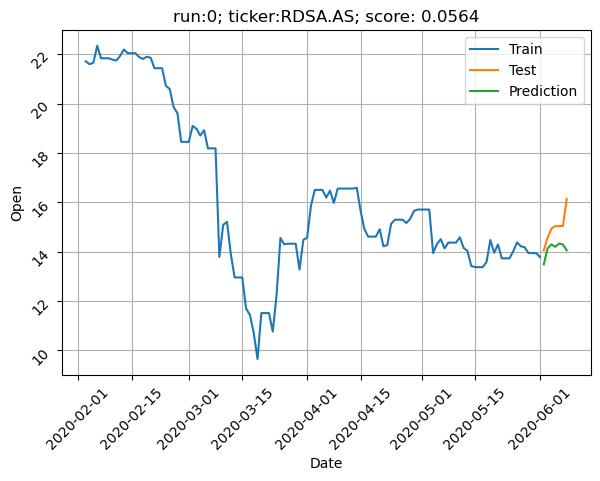

test score:  0.03058496201471498
test vs. pred run {i} [(11.21616547740537, 11.572511), (11.3001677645016, 11.572947), (11.273439901248578, 11.431963), (11.122618447272284, 11.468447), (11.122618447272284, 11.439409), (11.122618447272284, 11.438026), (10.841974549116479, 11.451203)]


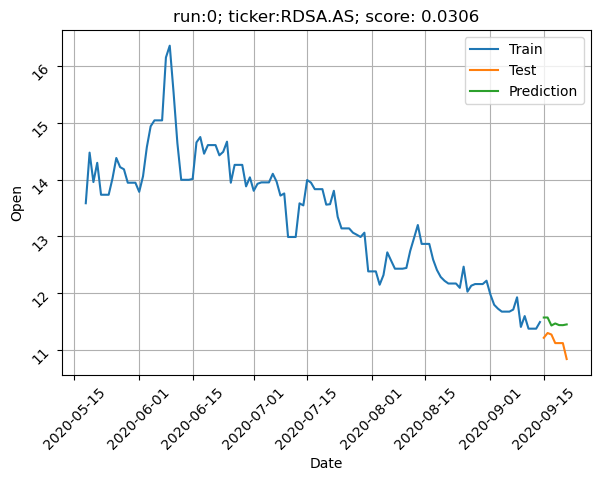

test score:  0.017892372394505276
test vs. pred run {i} [(15.58655809114527, 15.931548), (15.556963835688977, 16.01639), (16.07980248848505, 16.059027), (15.973262554418676, 16.138325), (15.973262554418676, 16.25463), (15.973262554418676, 16.248259), (15.783855611518774, 16.211983)]


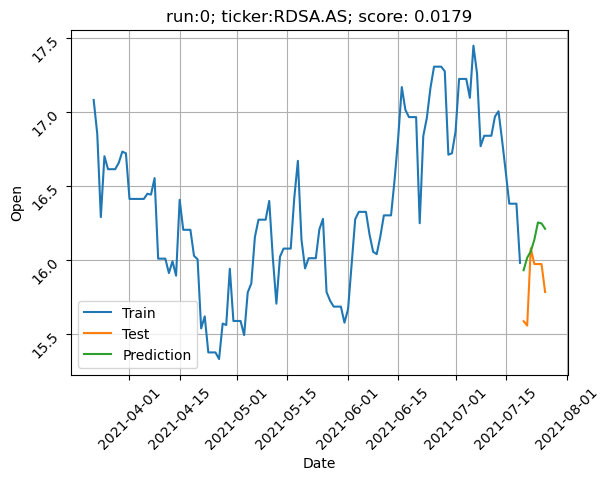

test score:  0.00762573253915319
test vs. pred run {i} [(12.319783662195306, 12.498009), (12.718722651897014, 12.427294), (12.573136748710647, 12.434213), (12.431334529425106, 12.426922), (12.431334529425106, 12.439387), (12.431334529425106, 12.425231), (12.44456855679547, 12.401546)]


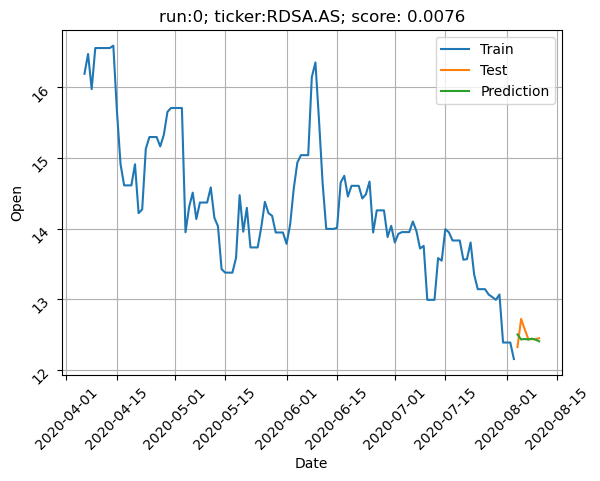

test score:  0.017892372394505276
test vs. pred run {i} [(15.58655809114527, 15.931548), (15.556963835688977, 16.01639), (16.07980248848505, 16.059027), (15.973262554418676, 16.138325), (15.973262554418676, 16.25463), (15.973262554418676, 16.248259), (15.783855611518774, 16.211983)]


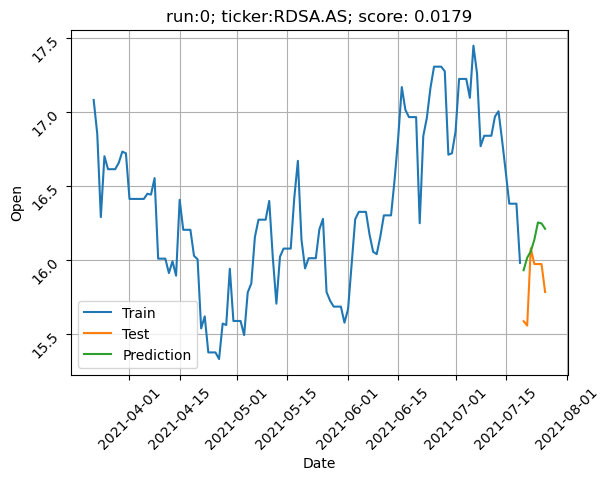

test score:  0.045473098289781085
test vs. pred run {i} [(10.324600529869894, 10.054), (10.383783395093925, 10.095105), (10.452511500098685, 10.058828), (10.738882435892382, 10.219181), (10.738882435892382, 10.116184), (10.738882435892382, 10.089539), (10.801884173924588, 10.156027)]


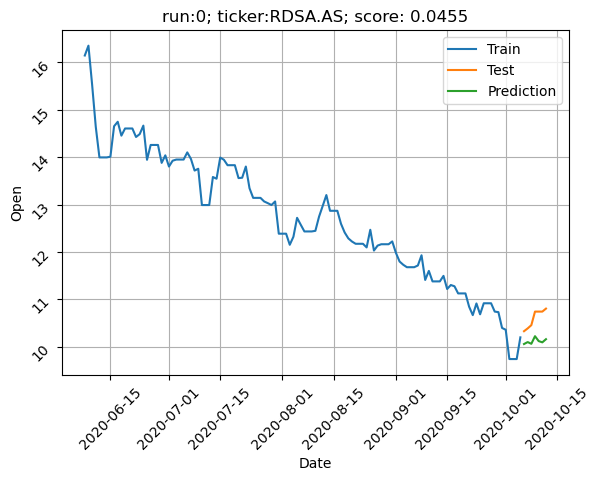

test score:  0.021051376636450403
test vs. pred run {i} [(14.3787534464616, 14.076848), (14.21804295287799, 13.868735), (14.180230497327729, 13.70729), (13.943893613065244, 13.820183), (13.943893613065244, 14.214833), (13.943893613065244, 14.097332), (13.783184268598074, 14.184774)]


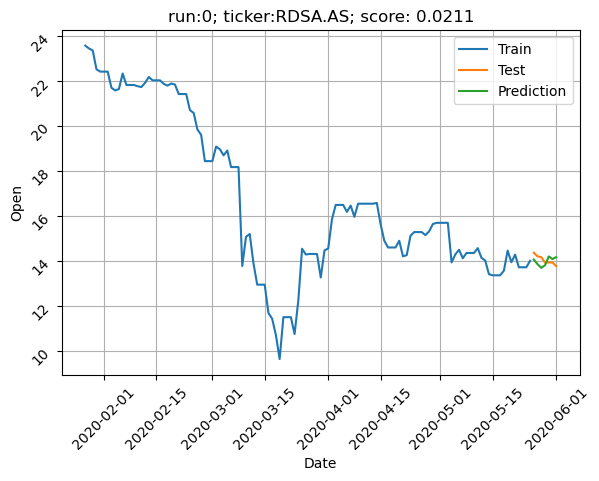

test score:  0.07402978425739783
test vs. pred run {i} [(10.727428348168395, 10.829486), (10.393328338912813, 10.777411), (10.355145942559329, 10.835338), (9.736585505214702, 10.925876), (9.736585505214702, 10.857997), (9.736585505214702, 10.8806505), (10.194779434875267, 10.913965)]


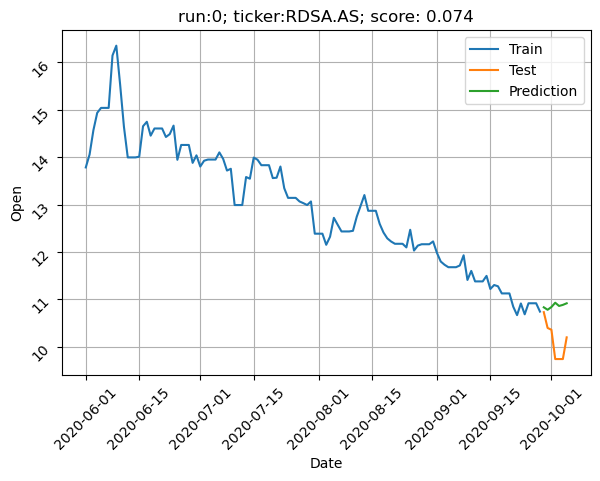

In [121]:
from run import *
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from xgboost import XGBRegressor


sample_stock = "RDSA.AS"
y_cols = ["open"]
random_state = np.random.RandomState(1)
length_prediction = 7
train_test_ratio = 20.0
period = 1
blacklist = [
'ticker', 'dt_iso_year_week', 'dt_year', 'dt_month', 'dt_day',
'dt_day_of_week', 'dt_iso_week', 'dt_is_weekend', 'dt_is_week',
'dt_is_monday', 'dt_is_tuesday', 'dt_is_wednesday', 'dt_is_thursday',
'dt_is_friday', 'dt_is_saturday', 'dt_is_sunday', 
'open', 'high', 'low', 'close', 'volume',
'is_original_stockdata', 'open_is_increase', 'open_is_decrease',
'open_is_equal', 'close_is_increase', 'close_is_decrease',
'close_is_equal', 'low_is_increase', 'low_is_decrease', 'low_is_equal',
'high_is_increase', 'high_is_decrease', 'high_is_equal',
'volume_is_increase', 'volume_is_decrease', 'volume_is_equal',
'is_original_jhu', 'daily_doses',
'c1_policyvalue_actual', 'c2_policyvalue_actual',
'c3_policyvalue_actual', 'c4_policyvalue_actual',
'c5_policyvalue_actual', 'c6_policyvalue_actual',
'c7_policyvalue_actual', 'c8_policyvalue_actual',
'e1_policyvalue_actual', 'e2_policyvalue_actual',
'e3_policyvalue_actual', 'e4_policyvalue_actual',
'h1_policyvalue_actual', 'h2_policyvalue_actual',
'h3_policyvalue_actual', 'h4_policyvalue_actual',
'h5_policyvalue_actual', 'h6_policyvalue_actual',
'h7_policyvalue_actual', 'h8_policyvalue_actual',
'v1_policyvalue_actual', 'v2_policyvalue_actual',
'v3_policyvalue_actual'
]

# filter stock and non zero
df_rdsa, sample_stock = sample_single_stock(data, random_state, sample_stock)
non_zero = df[df[y_cols[0]] != 0]
non_zero_start, non_zero_end = non_zero[y_cols[0]].index.min(), non_zero[y_cols[0]].index.max()
df = df_rdsa.loc[non_zero_start:non_zero_end].copy()

# transform pipeline
transform_pipeline =  Pipeline([
    # ('scaler', StandardScaler()),
    # ('minmax', MinMaxScaler((1,1000))),
    ('log', FunctionTransformer(log_transform)),
    # ('minmax2', MinMaxScaler((1,1000))),
    # ('normality_transform', PowerTransformer()),   
    ('minmax', MinMaxScaler()),
])

# XGBoost code
pipe = Pipeline([
    # ('feature_selection', RFECV(XGBRegressor(objective='reg:squarederror'))),
    ('xgboost', XGBRegressor(objective='reg:squarederror'))
])

import matplotlib.pyplot as plt

def sub_data(df, ticker, start, end):
    df = df.loc[start:end].reset_index()
    return df[df["ticker"] == ticker].set_index("date")

def plot_result(data, sample_stock, train_start, train_end, test_start, test_end, test_score):
    fig, axs = plt.subplots(1,1)
    result_df = sub_data(data, sample_stock, train_start, test_end)
    x_train = pd.date_range(train_start, train_end, freq="D")
    x_test = pd.date_range(test_start, test_end, freq="D")
    axs.plot(x_train, result_df.loc[train_start:train_end]["open"])
    axs.plot(x_test, result_df.loc[test_start:test_end]["open"])
    axs.plot(x_test, y_pred)

    axs.set(xlabel='Date', ylabel="Open", title=f'run:0; ticker:{sample_stock}; score: {round(test_score, 4)}')
    axs.tick_params(labelrotation=45)
    axs.legend(["Train", "Test", "Prediction"])
    axs.grid()

    fig.tight_layout()
    # tight_layout doesn't take these labels into account. We'll need 
    # to make some room. These numbers are are manually tweaked. 
    # You could automatically calculate them, but it's a pain.
    fig.subplots_adjust(left=0.15, top=0.95)

    plt.show()

for i in range(10):
    # Sample time period
    train_start, train_end, test_start, test_end, val_start, val_end = sample_time_series(df, random_state, length_prediction, train_test_ratio, period)
    X_cols = get_expl_vars(df.columns, ["open", "close", "high", "low", "volume"], blacklist = full_blacklist)
    X, y = df[X_cols].copy(), df[y_cols].copy()
    X["date"] = X.index.get_level_values("date")
    X["date"] = X["date"].map(datetime.toordinal)
    X_index, X_columns = X.index, X.columns
    X = pd.DataFrame(transform_pipeline.fit_transform(X, y), columns=X_columns, index=X_index)

    # Split X and y in train and test
    X_train, y_train, X_test, y_test, _, _ = train_test_val_split(X, y, train_start, train_end, test_start, test_end, val_start, val_end)

    # grid_search = GridSearchCV(pipe.fit(X_train, y_train), param_grid={}, n_jobs=-1, verbose=1)
    fit = pipe.fit(X_train, y_train)
    y_pred = fit.predict(X=X_test)
    test_score = metrics.mean_absolute_percentage_error(y_test, y_pred)
    print("test score: ", test_score)
    print("test vs. pred run {i}", list(zip(y_test.values.ravel(), y_pred)))
    plot_result(data, sample_stock, train_start, train_end, test_start, test_end, test_score)

In [112]:
import matplotlib.pyplot as plt

def sub_data(df, ticker, start, end):
    df = df.loc[start:end].reset_index()
    return df[df["ticker"] == ticker].set_index("date")

def plot_result():
    fig, axs = plt.subplots(1,1)
    result_df = sub_data(data, sample_stock, train_start, test_end)
    x_train = pd.date_range(train_start, train_end, freq="D")
    x_test = pd.date_range(test_start, test_end, freq="D")
    axs.plot(x_train, result_df.loc[train_start:train_end]["open"])
    axs.plot(x_test, result_df.loc[test_start:test_end]["open"])
    axs.plot(x_test, y_pred)

    axs.set(xlabel='Date', ylabel="Open", title=f'run:0; ticker:{sample_stock}; score: {round(test_score, 4)}')
    axs.tick_params(labelrotation=45)
    axs.legend(["Train", "Test", "Prediction"])
    axs.grid()

    fig.tight_layout()
    # tight_layout doesn't take these labels into account. We'll need 
    # to make some room. These numbers are are manually tweaked. 
    # You could automatically calculate them, but it's a pain.
    fig.subplots_adjust(left=0.15, top=0.95)

    plt.show()

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.07989307383404963
test vs. pred run {i} [(14.526117139917545, 13.467213106995892), (15.173654934315765, 13.430772714274658), (14.740674121364215, 13.477408183461998), (14.576373903267324, 13.482217043252115), (14.576373903267324, 13.467951937529296), (14.576373903267324, 13.658536423430537), (14.497122404028316, 13.457393577979156)]


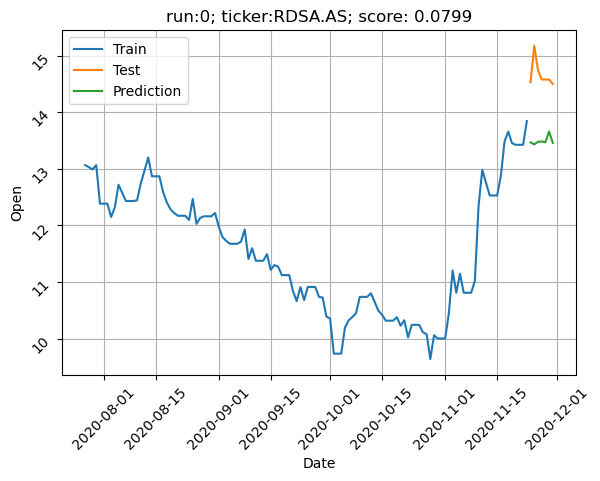

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.06318638694920921
test vs. pred run {i} [(11.204711867584022, 10.120399157806482), (10.813337900594002, 10.27922060297924), (11.14743741445847, 10.26108419931321), (10.811429412194618, 10.298941956212435), (10.811429412194618, 10.27922060297924), (10.811429412194618, 10.261695096187134), (11.019524814280738, 10.25753286540725)]


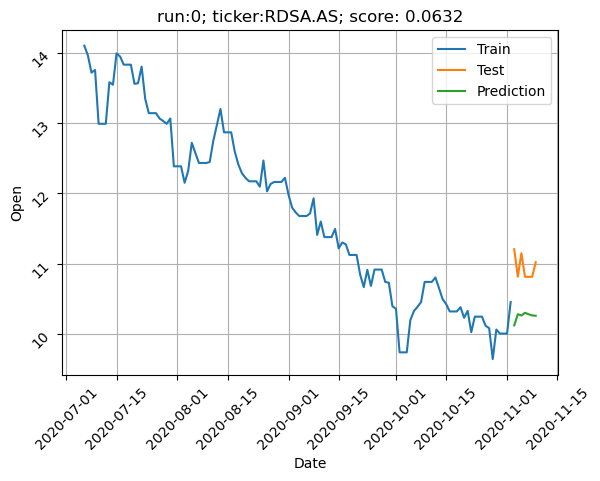

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.07149118195234104
test vs. pred run {i} [(14.057335194616956, 13.93825603275338), (14.569714035083441, 13.951970818676688), (14.9365105306455, 13.87720933301118), (15.040498028083404, 13.804455103742228), (15.040498028083404, 13.8679133292653), (15.040498028083404, 13.865978578557598), (16.146556899532452, 13.879343801334366)]


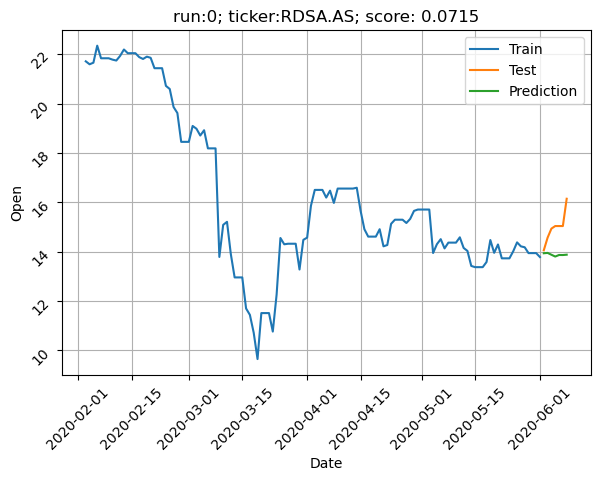

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.029335034154698902
test vs. pred run {i} [(11.21616547740537, 11.509715526443848), (11.3001677645016, 11.472009994980635), (11.273439901248578, 11.467713843065718), (11.122618447272284, 11.466663825028842), (11.122618447272284, 11.452345312921295), (11.122618447272284, 11.451619823393564), (10.841974549116479, 11.455380873109313)]


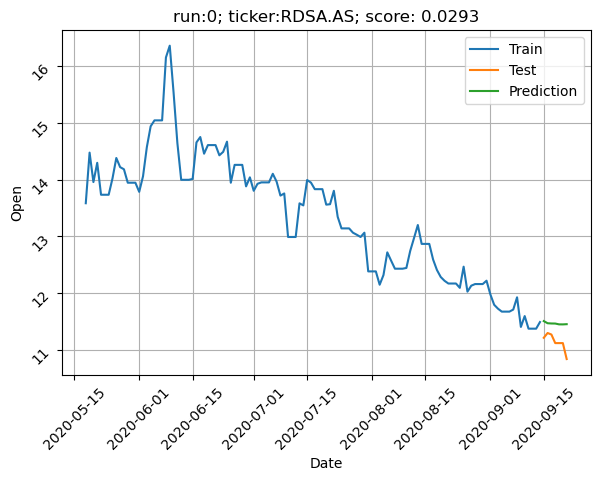

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.02964860067648
test vs. pred run {i} [(15.58655809114527, 16.24833650409919), (15.556963835688977, 16.162097556419997), (16.07980248848505, 16.183188662573112), (15.973262554418676, 16.409331567349412), (15.973262554418676, 16.39919055331512), (15.973262554418676, 16.41674994414275), (15.783855611518774, 16.384037910687837)]


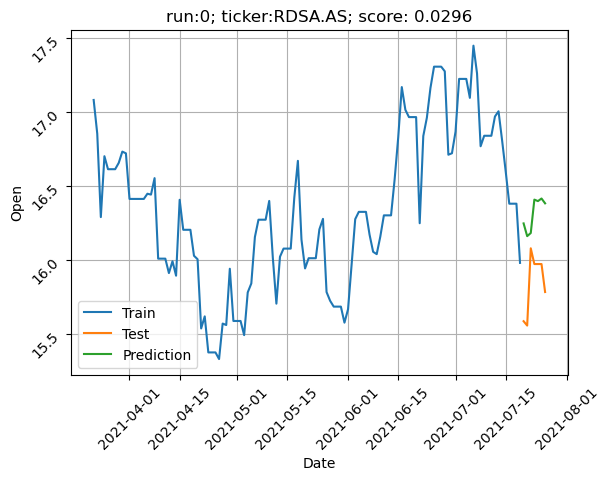

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.008236736477571295
test vs. pred run {i} [(12.319783662195306, 12.476920595302467), (12.718722651897014, 12.443946776628795), (12.573136748710647, 12.404072037781232), (12.431334529425106, 12.375617039478586), (12.431334529425106, 12.397265525703892), (12.431334529425106, 12.44129981190967), (12.44456855679547, 12.421825604280642)]


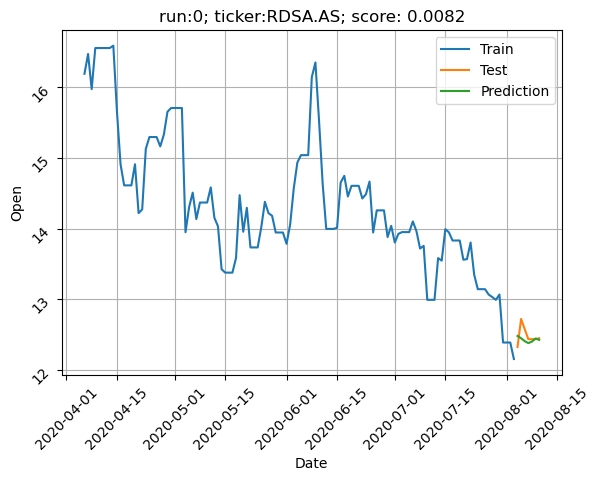

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.03406425504711342
test vs. pred run {i} [(15.58655809114527, 16.27883870735188), (15.556963835688977, 16.266132678553614), (16.07980248848505, 16.26240374609947), (15.973262554418676, 16.47104639560537), (15.973262554418676, 16.47992503016694), (15.973262554418676, 16.48876389129125), (15.783855611518774, 16.445792191414935)]


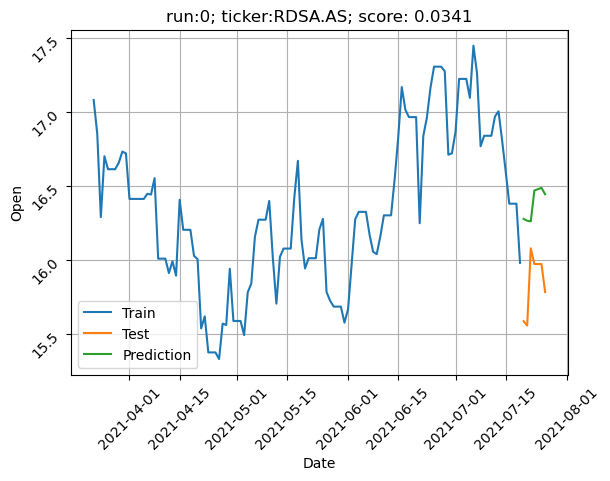

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.03738749788264808
test vs. pred run {i} [(10.324600529869894, 10.120704322026286), (10.383783395093925, 10.158963380884), (10.452511500098685, 10.198386949533948), (10.738882435892382, 10.185614851303706), (10.738882435892382, 10.24579075252135), (10.738882435892382, 10.242717049732512), (10.801884173924588, 10.236283224475988)]


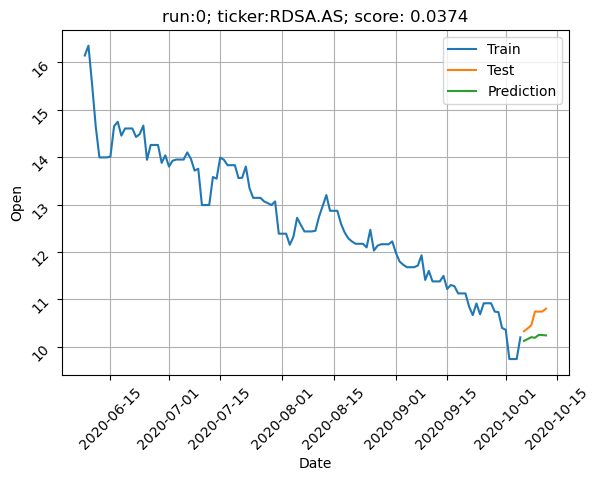

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.01286738143560925
test vs. pred run {i} [(14.3787534464616, 13.967620723967215), (14.21804295287799, 13.957727891066124), (14.180230497327729, 13.854458303756694), (13.943893613065244, 13.885820798200795), (13.943893613065244, 13.988550960249686), (13.943893613065244, 13.963134339637113), (13.783184268598074, 13.940986095946364)]


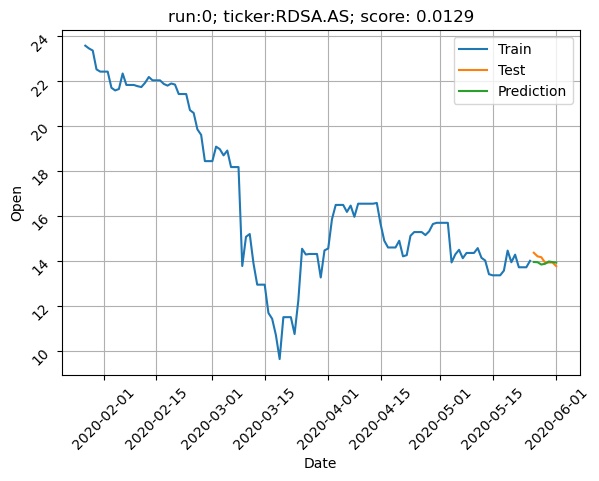

C:\tools\Anaconda3\envs\thesis\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


test score:  0.07218488321046115
test vs. pred run {i} [(10.727428348168395, 10.85730567330375), (10.393328338912813, 10.820707682717225), (10.355145942559329, 10.845278207192498), (9.736585505214702, 10.851635633072146), (9.736585505214702, 10.852341998271209), (9.736585505214702, 10.815820254450346), (10.194779434875267, 10.85514839402482)]


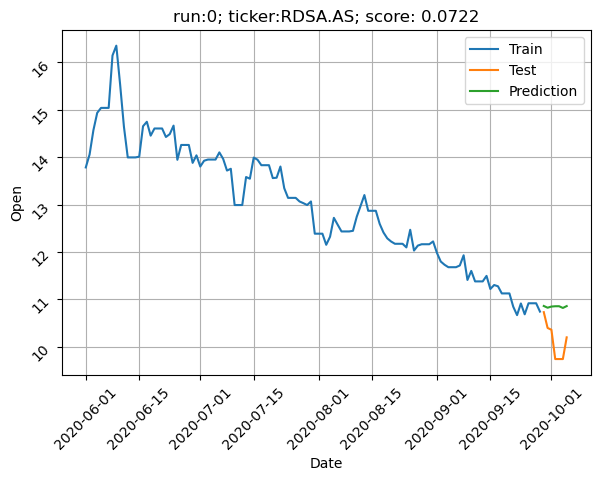

In [118]:
from run import *
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from xgboost import XGBRegressor


sample_stock = "RDSA.AS"
y_cols = ["open"]
random_state = np.random.RandomState(1)
length_prediction = 7
train_test_ratio = 20.0
period = 1
blacklist = [
'ticker', 'dt_iso_year_week', 'dt_year', 'dt_month', 'dt_day',
'dt_day_of_week', 'dt_iso_week', 'dt_is_weekend', 'dt_is_week',
'dt_is_monday', 'dt_is_tuesday', 'dt_is_wednesday', 'dt_is_thursday',
'dt_is_friday', 'dt_is_saturday', 'dt_is_sunday', 
'open', 'high', 'low', 'close', 'volume',
'is_original_stockdata', 'open_is_increase', 'open_is_decrease',
'open_is_equal', 'close_is_increase', 'close_is_decrease',
'close_is_equal', 'low_is_increase', 'low_is_decrease', 'low_is_equal',
'high_is_increase', 'high_is_decrease', 'high_is_equal',
'volume_is_increase', 'volume_is_decrease', 'volume_is_equal',
'is_original_jhu', 'daily_doses',
'c1_policyvalue_actual', 'c2_policyvalue_actual',
'c3_policyvalue_actual', 'c4_policyvalue_actual',
'c5_policyvalue_actual', 'c6_policyvalue_actual',
'c7_policyvalue_actual', 'c8_policyvalue_actual',
'e1_policyvalue_actual', 'e2_policyvalue_actual',
'e3_policyvalue_actual', 'e4_policyvalue_actual',
'h1_policyvalue_actual', 'h2_policyvalue_actual',
'h3_policyvalue_actual', 'h4_policyvalue_actual',
'h5_policyvalue_actual', 'h6_policyvalue_actual',
'h7_policyvalue_actual', 'h8_policyvalue_actual',
'v1_policyvalue_actual', 'v2_policyvalue_actual',
'v3_policyvalue_actual'
]

# filter stock and non zero
df_rdsa, sample_stock = sample_single_stock(data, random_state, sample_stock)
non_zero = df[df[y_cols[0]] != 0]
non_zero_start, non_zero_end = non_zero[y_cols[0]].index.min(), non_zero[y_cols[0]].index.max()
df = df_rdsa.loc[non_zero_start:non_zero_end].copy()

# transform pipeline
transform_pipeline =  Pipeline([
    # ('scaler', StandardScaler()),
    # ('minmax', MinMaxScaler((1,1000))),
    ('log', FunctionTransformer(log_transform)),
    # ('minmax2', MinMaxScaler((1,1000))),
    # ('normality_transform', PowerTransformer()),   
    ('minmax', MinMaxScaler()),
])

# XGBoost code
pipe = Pipeline([
    # ('feature_selection', RFECV(XGBRegressor(objective='reg:squarederror'))),
    ('rfr', RandomForestRegressor())
])

import matplotlib.pyplot as plt

def sub_data(df, ticker, start, end):
    df = df.loc[start:end].reset_index()
    return df[df["ticker"] == ticker].set_index("date")

def plot_result(data, sample_stock, train_start, train_end, test_start, test_end, test_score):
    fig, axs = plt.subplots(1,1)
    result_df = sub_data(data, sample_stock, train_start, test_end)
    x_train = pd.date_range(train_start, train_end, freq="D")
    x_test = pd.date_range(test_start, test_end, freq="D")
    axs.plot(x_train, result_df.loc[train_start:train_end]["open"])
    axs.plot(x_test, result_df.loc[test_start:test_end]["open"])
    axs.plot(x_test, y_pred)

    axs.set(xlabel='Date', ylabel="Open", title=f'run:0; ticker:{sample_stock}; score: {round(test_score, 4)}')
    axs.tick_params(labelrotation=45)
    axs.legend(["Train", "Test", "Prediction"])
    axs.grid()

    fig.tight_layout()
    # tight_layout doesn't take these labels into account. We'll need 
    # to make some room. These numbers are are manually tweaked. 
    # You could automatically calculate them, but it's a pain.
    fig.subplots_adjust(left=0.15, top=0.95)

    plt.show()

for i in range(10):
    # Sample time period
    train_start, train_end, test_start, test_end, val_start, val_end = sample_time_series(df, random_state, length_prediction, train_test_ratio, period)
    X_cols = get_expl_vars(df.columns, ["open", "close", "high", "low", "volume"], blacklist = full_blacklist)
    X, y = df[X_cols].copy(), df[y_cols].copy()
    X["date"] = X.index.get_level_values("date")
    X["date"] = X["date"].map(datetime.toordinal)
    X_index, X_columns = X.index, X.columns
    X = pd.DataFrame(transform_pipeline.fit_transform(X, y), columns=X_columns, index=X_index)

    # Split X and y in train and test
    X_train, y_train, X_test, y_test, _, _ = train_test_val_split(X, y, train_start, train_end, test_start, test_end, val_start, val_end)

    # grid_search = GridSearchCV(pipe.fit(X_train, y_train), param_grid={}, n_jobs=-1, verbose=1)
    fit = pipe.fit(X_train, y_train)
    y_pred = fit.predict(X=X_test)
    test_score = metrics.mean_absolute_percentage_error(y_test, y_pred)
    print("test score: ", test_score)
    print("test vs. pred run {i}", list(zip(y_test.values.ravel(), y_pred)))
    plot_result(data, sample_stock, train_start, train_end, test_start, test_end, test_score)

test score:  0.07757300522152673
test vs. pred run {i} [(14.526117139917545, 13.669241), (15.173654934315765, 13.639377), (14.740674121364215, 13.5062), (14.576373903267324, 13.547735), (14.576373903267324, 13.46394), (14.576373903267324, 13.471581), (14.497122404028316, 13.388357)]


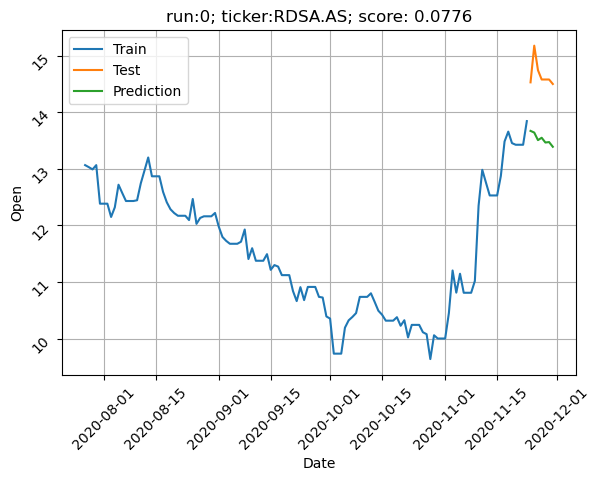

test score:  0.08642761930084637
test vs. pred run {i} [(11.204711867584022, 9.8642235), (10.813337900594002, 9.981695), (11.14743741445847, 9.947188), (10.811429412194618, 10.012886), (10.811429412194618, 10.016574), (10.811429412194618, 9.98008), (11.019524814280738, 10.176516)]


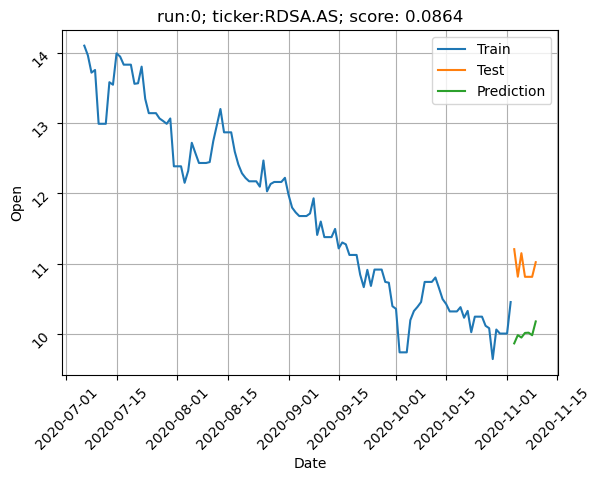

test score:  0.03897299817354875
test vs. pred run {i} [(14.057335194616956, 14.139091), (14.569714035083441, 14.640626), (14.9365105306455, 14.368012), (15.040498028083404, 14.56644), (15.040498028083404, 14.535132), (15.040498028083404, 14.398221), (16.146556899532452, 14.269604)]


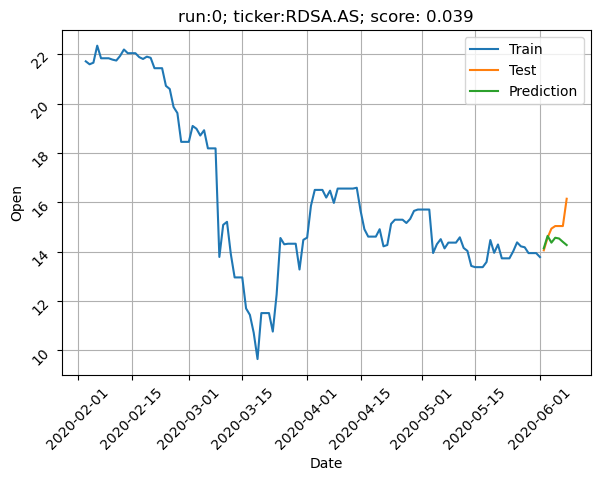

test score:  0.026820688688020615
test vs. pred run {i} [(11.21616547740537, 11.675692), (11.3001677645016, 11.565829), (11.273439901248578, 11.404406), (11.122618447272284, 11.369846), (11.122618447272284, 11.3328495), (11.122618447272284, 11.353384), (10.841974549116479, 11.381601)]


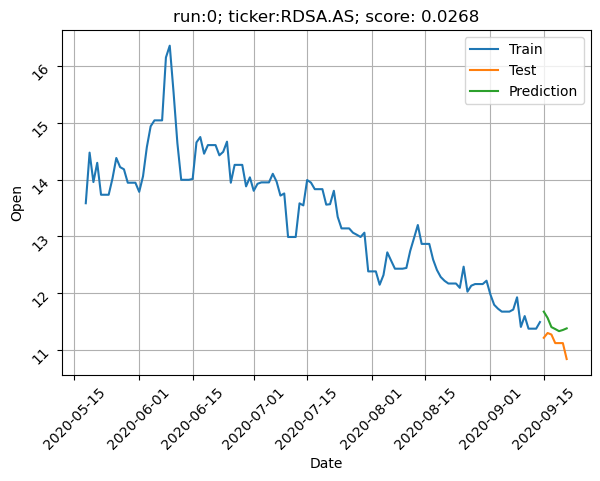

test score:  0.021419335755520148
test vs. pred run {i} [(15.58655809114527, 16.036064), (15.556963835688977, 16.143736), (16.07980248848505, 16.141329), (15.973262554418676, 16.194185), (15.973262554418676, 16.292252), (15.973262554418676, 16.269989), (15.783855611518774, 16.212776)]


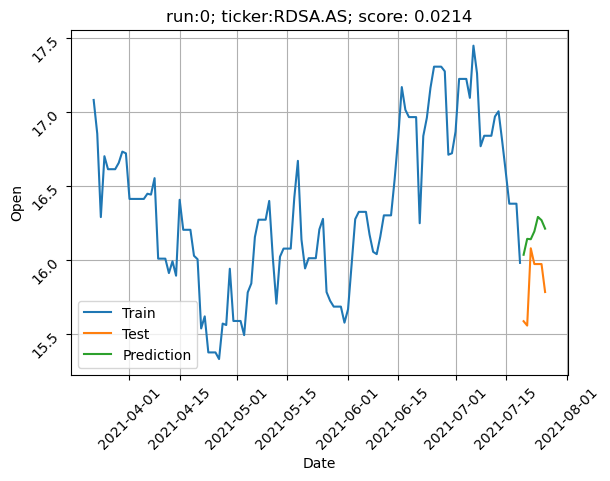

test score:  0.01099901071709474
test vs. pred run {i} [(12.319783662195306, 12.334282), (12.718722651897014, 12.302986), (12.573136748710647, 12.369991), (12.431334529425106, 12.36147), (12.431334529425106, 12.377672), (12.431334529425106, 12.330951), (12.44456855679547, 12.33306)]


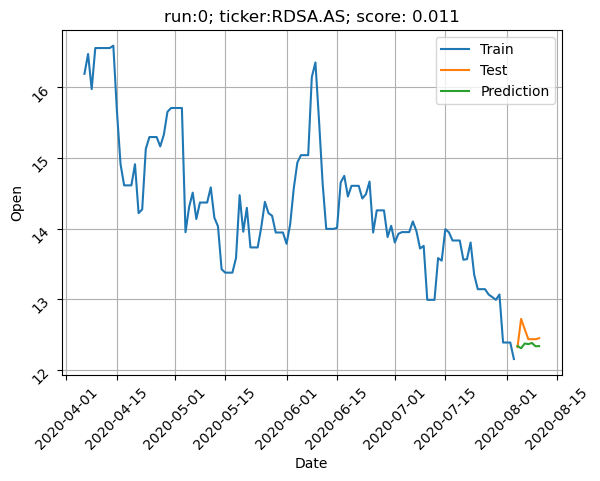

test score:  0.021419335755520148
test vs. pred run {i} [(15.58655809114527, 16.036064), (15.556963835688977, 16.143736), (16.07980248848505, 16.141329), (15.973262554418676, 16.194185), (15.973262554418676, 16.292252), (15.973262554418676, 16.269989), (15.783855611518774, 16.212776)]


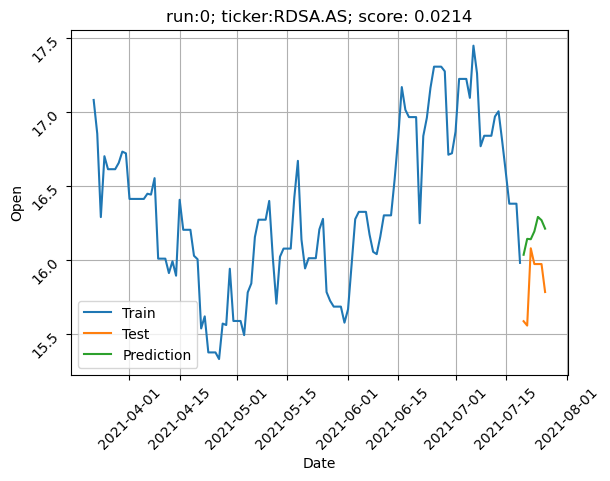

test score:  0.043272110134565396
test vs. pred run {i} [(10.324600529869894, 10.152364), (10.383783395093925, 10.084726), (10.452511500098685, 10.103496), (10.738882435892382, 10.174256), (10.738882435892382, 10.161377), (10.738882435892382, 10.160404), (10.801884173924588, 10.112625)]


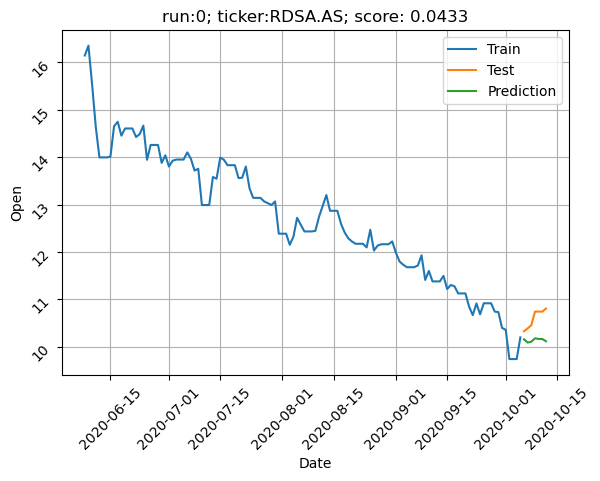

test score:  0.02625053243209516
test vs. pred run {i} [(14.3787534464616, 13.886827), (14.21804295287799, 13.836094), (14.180230497327729, 13.473896), (13.943893613065244, 13.470868), (13.943893613065244, 14.156924), (13.943893613065244, 13.942963), (13.783184268598074, 14.108452)]


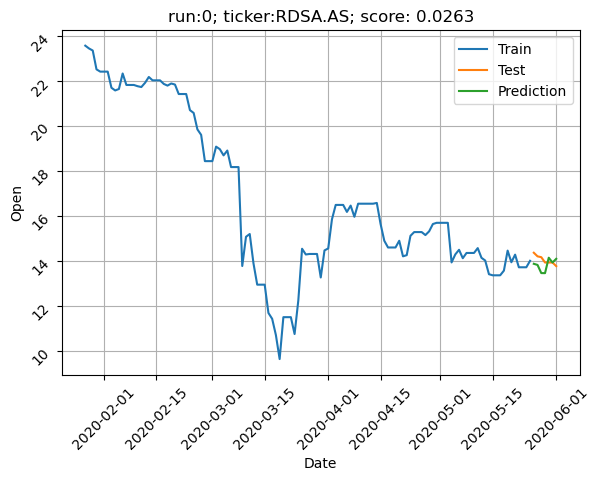

test score:  0.07692491058780855
test vs. pred run {i} [(10.727428348168395, 10.90695), (10.393328338912813, 10.725225), (10.355145942559329, 10.849184), (9.736585505214702, 10.985538), (9.736585505214702, 10.850904), (9.736585505214702, 10.957537), (10.194779434875267, 10.948963)]


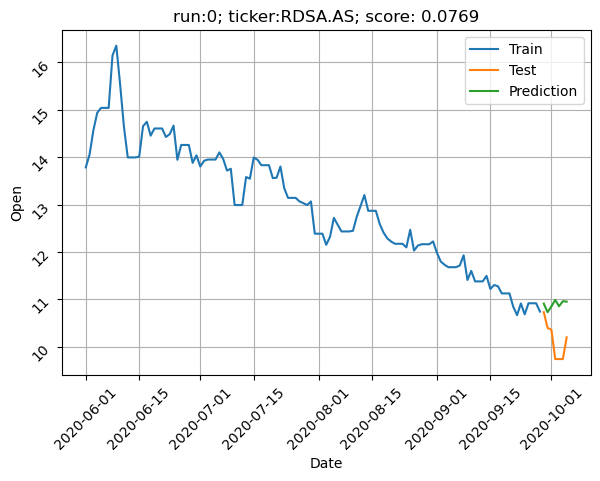

In [122]:
from run import *
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from xgboost import XGBRegressor


sample_stock = "RDSA.AS"
y_cols = ["open"]
random_state = np.random.RandomState(1)
length_prediction = 7
train_test_ratio = 20.0
period = 1
blacklist = [
# 'ticker', 
'dt_iso_year_week', 'dt_year', 'dt_month', 'dt_day',
'dt_day_of_week', 'dt_iso_week', 'dt_is_weekend', 'dt_is_week',
'dt_is_monday', 'dt_is_tuesday', 'dt_is_wednesday', 'dt_is_thursday',
'dt_is_friday', 'dt_is_saturday', 'dt_is_sunday', 
'open', 'high', 'low', 'close', 'volume',
'is_original_stockdata', 'open_is_increase', 'open_is_decrease',
'open_is_equal', 'close_is_increase', 'close_is_decrease',
'close_is_equal', 'low_is_increase', 'low_is_decrease', 'low_is_equal',
'high_is_increase', 'high_is_decrease', 'high_is_equal',
'volume_is_increase', 'volume_is_decrease', 'volume_is_equal',
'is_original_jhu', 'daily_doses',
'c1_policyvalue_actual', 'c2_policyvalue_actual',
'c3_policyvalue_actual', 'c4_policyvalue_actual',
'c5_policyvalue_actual', 'c6_policyvalue_actual',
'c7_policyvalue_actual', 'c8_policyvalue_actual',
'e1_policyvalue_actual', 'e2_policyvalue_actual',
'e3_policyvalue_actual', 'e4_policyvalue_actual',
'h1_policyvalue_actual', 'h2_policyvalue_actual',
'h3_policyvalue_actual', 'h4_policyvalue_actual',
'h5_policyvalue_actual', 'h6_policyvalue_actual',
'h7_policyvalue_actual', 'h8_policyvalue_actual',
'v1_policyvalue_actual', 'v2_policyvalue_actual',
'v3_policyvalue_actual'
]

# filter stock and non zero
# df_rdsa, sample_stock = sample_single_stock(data, random_state, sample_stock)
non_zero = df[df[y_cols[0]] != 0]
non_zero_start, non_zero_end = non_zero[y_cols[0]].index.min(), non_zero[y_cols[0]].index.max()
df = df.loc[non_zero_start:non_zero_end].copy()

# transform pipeline
transform_pipeline =  Pipeline([
    # ('scaler', StandardScaler()),
    # ('minmax', MinMaxScaler((1,1000))),
    ('log', FunctionTransformer(log_transform)),
    # ('minmax2', MinMaxScaler((1,1000))),
    # ('normality_transform', PowerTransformer()),   
    ('minmax', MinMaxScaler()),
])

# XGBoost code
pipe = Pipeline([
    # ('feature_selection', RFECV(XGBRegressor(objective='reg:squarederror'))),
    ('xgboost', XGBRegressor(objective='reg:squarederror'))
])

import matplotlib.pyplot as plt

def sub_data(df, ticker, start, end):
    df = df.loc[start:end].reset_index()
    return df[df["ticker"] == ticker].set_index("date")

def plot_result(data, sample_stock, train_start, train_end, test_start, test_end, test_score):
    fig, axs = plt.subplots(1,1)
    result_df = sub_data(data, sample_stock, train_start, test_end)
    x_train = pd.date_range(train_start, train_end, freq="D")
    x_test = pd.date_range(test_start, test_end, freq="D")
    axs.plot(x_train, result_df.loc[train_start:train_end]["open"])
    axs.plot(x_test, result_df.loc[test_start:test_end]["open"])
    axs.plot(x_test, y_pred)

    axs.set(xlabel='Date', ylabel="Open", title=f'run:0; ticker:{sample_stock}; score: {round(test_score, 4)}')
    axs.tick_params(labelrotation=45)
    axs.legend(["Train", "Test", "Prediction"])
    axs.grid()

    fig.tight_layout()
    # tight_layout doesn't take these labels into account. We'll need 
    # to make some room. These numbers are are manually tweaked. 
    # You could automatically calculate them, but it's a pain.
    fig.subplots_adjust(left=0.15, top=0.95)

    plt.show()

for i in range(10):
    # Sample time period
    train_start, train_end, test_start, test_end, val_start, val_end = sample_time_series(df, random_state, length_prediction, train_test_ratio, period)
    X_cols = get_expl_vars(df.columns, ["open", "close", "high", "low", "volume"], blacklist = blacklist)
    X, y = df[X_cols].copy(), df[y_cols].copy()
    X["date"] = X.index.get_level_values("date")
    X["date"] = X["date"].map(datetime.toordinal)
    X_index, X_columns = X.index, X.columns
    X = pd.DataFrame(transform_pipeline.fit_transform(X, y), columns=X_columns, index=X_index)

    # Split X and y in train and test
    X_train, y_train, X_test, y_test, _, _ = train_test_val_split(X, y, train_start, train_end, test_start, test_end, val_start, val_end)

    # grid_search = GridSearchCV(pipe.fit(X_train, y_train), param_grid={}, n_jobs=-1, verbose=1)
    fit = pipe.fit(X_train, y_train)
    y_pred = fit.predict(X=X_test)
    test_score = metrics.mean_absolute_percentage_error(y_test, y_pred)
    print("test score: ", test_score)
    print("test vs. pred run {i}", list(zip(y_test.values.ravel(), y_pred)))
    plot_result(data, sample_stock, train_start, train_end, test_start, test_end, test_score)